<font color ='green' size = 8>Estudo de Monte Carlo e Aplicações</font>

# Introdução
Neste notebook manterei as minhas anotações de livros, estudos, testes e aplicações referentes a simulação de Monte Carlo. Tenho como objetivo abordar como aplicar e onde aplicar, trazendo os detalhes. No início de manterei anotado as referências utilizadas (quando utilizadas).

## Autor principal: 
Kaue Hermann Abbehausen

# Referências
1. Livro: A guide to monte carlo simulation in statistical physics

# Calculando integrais e valores
Para realizar isto imaginamos a função limitada por uma caixa entre valor *a* e *b*, valores do limite de integração. Jogamos vários pontos no gráficos e fazemos a razão dos pontos de cairam abaixo da linha da função pela quantidade total de ponto, e multiplicamos pela área total.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import random as rd
import pandas as pd
import matplotlib.animation as animation
from IPython.display import HTML

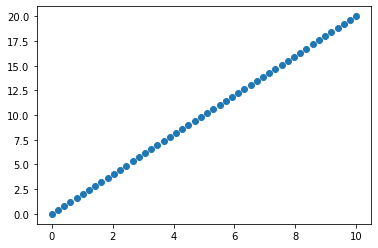

In [2]:
# Função desejada
x = np.linspace(0,10)
f = x*2
# a integral é=x^2/2
plt.scatter(x, f)

In [3]:
round(rd.uniform(0, 10), 2)

0.27

In [4]:
N = 100000
Ni = 0
for i in range(N):
    
    nr = [round(rd.uniform(0, 10.01), 2),round(rd.uniform(0, 20.01), 2)]
    fnr = nr[0]*2
    if fnr<nr[1]:
        Ni+=1
I2 = integrate.quad(lambda x: x*2,0,10)
I = (Ni/N)*(10*20)
print(f'Valores abaixo da função: {Ni}\n Integral por integrate: {I2[0]}\n Integral Monte Carlo: {I}')

Valores abaixo da função: 50056
 Integral por integrate: 100.0
 Integral Monte Carlo: 100.112


## Fazendo integral do cosseno

In [227]:
limite_i = 0
limite_f = 2*np.pi
Ni = 0
# funcao
f = lambda x: np.cos(x)
x = np.linspace(0,2*np.pi,1000)

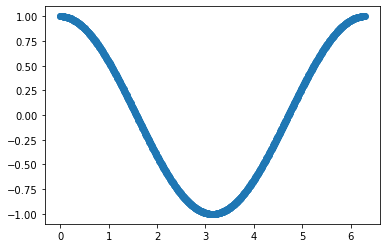

In [6]:
plt.scatter(x,f(x))

In [228]:
N = 1000
Val_Nr = []
Val_cor = []
for i in range(N):
    Nr = [round(rd.uniform(0, np.pi*2), 2),round(rd.uniform(-1,1), 2)]
    Val_Nr.append(Nr)
    if f(Nr[0]) > Nr[1] and Nr[1]>=0:
        Ni += 1
        Val_cor.append('green')
    elif f(Nr[0]) < Nr[1] and Nr[1]<=0:
        Ni += 1
        Val_cor.append('green')
    else:
        Val_cor.append('red')
        
        
I2 = integrate.quad(f,limite_i,limite_f)
I = (Ni/N)*(f(x)[-2]-f(x)[0])*(2)
print(f'Valores abaixo da função: {Ni}\n Integral por integrate: {I2[0]}\n Integral Monte Carlo: {I}')

Valores abaixo da função: 288
 Integral por integrate: 4.3598356225107897e-16
 Integral Monte Carlo: -1.1392520438448627e-05


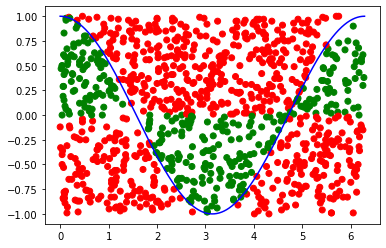

In [8]:
plt.scatter(np.array(Val_Nr).T[0],np.array(Val_Nr).T[1], marker = 'o', c = Val_cor)
plt.plot(x,f(x), color = 'blue')


## Animação Integral do Cosseno

In [317]:
limite_i = 0
limite_f = np.pi/2
Ni = 0
# funcao
f = lambda x: np.cos(x)
x = np.linspace(0,np.pi/2,100)
N = 700
Val_Nr = []
Val_cor = []
int_list = []
for y in range(N):
    Ni = 0
    t_val_Nr = []
    t_val_cor= []
    for i in range(y):
        Nr = [round(rd.uniform(0, np.pi/2), 2),round(rd.uniform(0,1), 2)]
        t_val_Nr.append(Nr)
        if f(Nr[0]) > Nr[1] and Nr[1]>=0:
            Ni += 1
            t_val_cor.append('green')
            #I = (Ni/N)*(x[-1])
            #int_list.append(I)
        #elif f(Nr[0]) < Nr[1] and Nr[1]<=0:
           # Ni += 1
            #Val_cor.append('green')
           # I = -(Ni/N)*(f(x)[-1]-f(x)[0])*(2)
        else:
            t_val_cor.append('red')
        
    I = (Ni/(y+1)*(x[-1]))
    #print(I)
    int_list.append(I)
    Val_Nr.append(t_val_Nr)
    Val_cor.append(t_val_cor)
I2 = integrate.quad(f,limite_i,limite_f)


In [219]:
Val_NR = np.array(Val_Nr[3]).T
Val_NR

array([[0.09, 1.23, 1.46],
       [0.34, 1.  , 0.97]])

In [279]:
int_list[200]

0.4052654523130833

Text(215, 0.9, 'Valor \n Teórico')

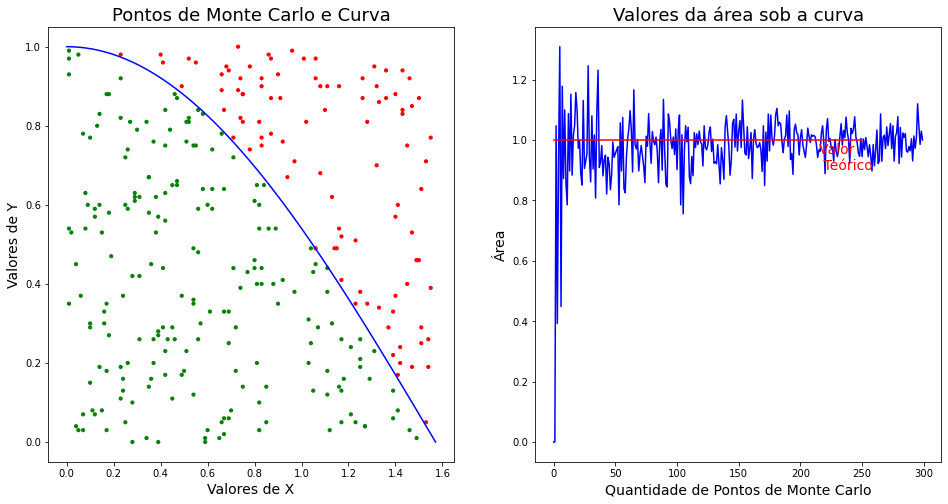

In [359]:
idx = 300
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (16,8))
#plt.xlim(-0.1,6.1)
#plt.ylim(-1.1,1.1)
ax[0].scatter(np.array(Val_Nr[idx]).T[0],np.array(Val_Nr[idx]).T[1], marker = 'o', c = Val_cor[idx], s = 10)
ax[0].plot(x,f(x), color = 'blue')


ax[1].plot(range(0,N)[:idx],int_list[:idx], c = 'blue')
ax[1].plot(np.linspace(0,250),[I2[0] for x in np.linspace(0,250)],c = 'red')

#Virula do Gráficos
ax[0].set_title('Pontos de Monte Carlo e Curva', fontsize = 18)
ax[0].set_xlabel('Valores de X', fontsize = 14)
ax[0].set_ylabel('Valores de Y', fontsize = 14)

ax[1].set_title('Valores da área sob a curva', fontsize = 18)
ax[1].set_xlabel('Quantidade de Pontos de Monte Carlo', fontsize = 14)
ax[1].set_ylabel('Área', fontsize = 14)
plt.text(215, 0.9,'Valor \n Teórico', fontsize = 14, c = 'red')

In [233]:
len(int_list)

200

MovieWriter ffmpeg unavailable; using Pillow instead.


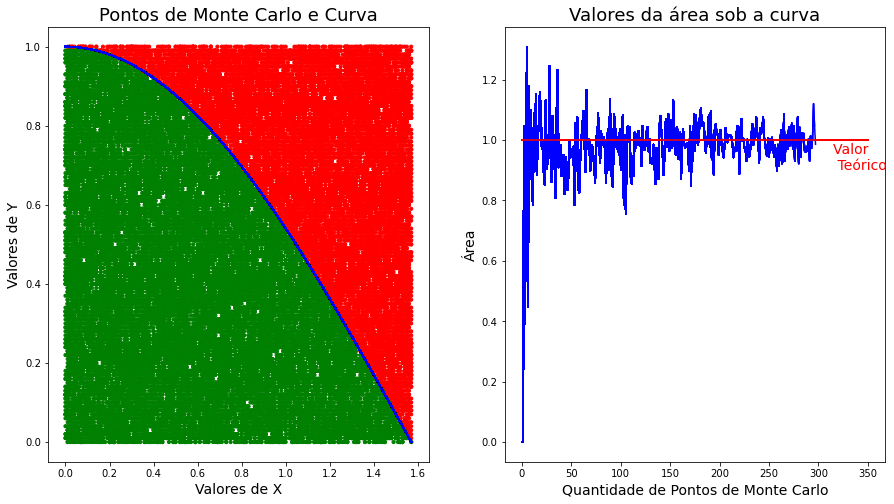

In [360]:
fig, ax = plt.subplots(nrows = 1, ncols = 2,figsize = (15,8))
ax[0].set_title('Pontos de Monte Carlo e Curva', fontsize = 18)
ax[0].set_xlabel('Valores de X', fontsize = 14)
ax[0].set_ylabel('Valores de Y', fontsize = 14)

ax[1].set_title('Valores da área sob a curva', fontsize = 18)
ax[1].set_xlabel('Quantidade de Pontos de Monte Carlo', fontsize = 14)
ax[1].set_ylabel('Área', fontsize = 14)
plt.text(315, 0.9,'Valor \n Teórico', fontsize = 14, c = 'red')
def func_anim(idx):
    ax[0].scatter(np.array(Val_Nr[idx+1]).T[0],np.array(Val_Nr[idx+1]).T[1], marker = 'o', c = Val_cor[idx+1],s = 10)
    ax[0].plot(x,f(x), color = 'blue')

    
    ax[1].plot(range(0,N)[:idx],int_list[:idx],c = 'blue')
    ax[1].plot(np.linspace(0,350),[I2[0] for x in np.linspace(0,350)],c = 'red')

anim = animation.FuncAnimation(fig, func_anim, frames = 300-1, interval = 100 , blit = False)
anim.save('anim.gif')

## Anotações de testes:
**Temos que prestar atenção há detalhes importantes:**
1. A forma do gráfico para verificar quais pontos são aceitos e quais pontos não são.
2. Podemos aumentar o número de ponto na hora de pegar os valores da função desejada. E temos que tomar cuidado por podemos zerar a área com estes pontos.
3. Tomar cuidado com as condições. Caso estejam erradas a conta sairá errada

# Simulando Decaimento Radioativo

In [9]:
N = 10000 #Número de Núcleos
dt = 1 #elemento de tempo
tf = 200 #tempo final
t = 0
p =0.2
Val = []
while t<tf:
    t+= dt
    Ni = 0
    for i in range(N):
        if round(rd.uniform(0, np.pi*2), 2)< p:
            Ni += 1
    N -= Ni
    Val.append([t,N])

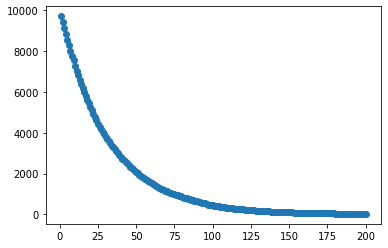

In [10]:
plt.scatter(np.array(Val).T[0],np.array(Val).T[1])

# Modelo de Ising

In [11]:
gradei = np.ones((10,10))
gradei

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

In [12]:
def calc_E(grade,linha, coluna):
    l = linha
    c = coluna
    #print(l,c)
    E = 2*(grade[(l+1)%10][c] + grade[(l-1)%10][c] + grade[l][(c+1)%10] + grade[l][(c-1)%10])
    #print(E)
    
    return E
    

In [13]:
N =100
gradei = np.ones((10,10))
grades = np.ones((10,10))
for i in range(N*1):
    for x in  range(9):
        for y in range(9):
            #print(gradei)
            s = gradei[x,y]
            dE = calc_E(gradei, x,y)*s
            #print(np . exp ( - dE/10  ))
            if dE < 0:
                gradei[x,y] *= -1
            elif np.random.rand() < np . exp ( - dE /10 ):
                gradei[x,y] *= -1
    grades = np.concatenate((grades,gradei))
    

In [14]:
len(grades)

1010

In [15]:
grades.shape

(1010, 10)

In [16]:
grades = grades.reshape((101,100))

In [17]:
grades[0].shape

(100,)

In [18]:
grades[0]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

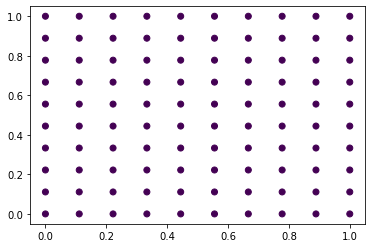

In [19]:
fig, ax = plt.subplots()
dots = np.linspace(0, 1, 10)
X, Y = np.meshgrid(dots, dots)
x, y = X.ravel(), Y.ravel()
ax.scatter(x, y, c=grades[0])

## Animação do Modelo de Ising 

MovieWriter ffmpeg unavailable; using Pillow instead.


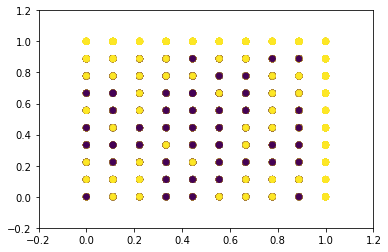

In [21]:
fig, ax = plt.subplots()
plt.xlim(-0.2,1.2)
plt.ylim(-0.2,1.2)

def plots(idx):
    dots = np.linspace(0, 1, 10)
    X, Y = np.meshgrid(dots, dots)
    x, y = X.ravel(), Y.ravel()
    ax.scatter(x, y, c=grades[idx])

anim = animation.FuncAnimation(fig, plots, frames = N, interval = 500 , blit = False)
anim.save('anim.gif')
#plots(2)

## Continuação Modelo de Ising

In [22]:
def calc_E(grade,l, c):
    E = 2*(grade[(l+1)%10][c] + grade[(l-1)%10][c] + grade[l][(c+1)%10] + grade[l][(c-1)%10])
    #print(E)
    
    return E

In [23]:
def energiat(grade):
    E = 0
    for x in range(10):
        for y in range(10):
            e = (grade[(x+1)%10][y] + grade[(x-1)%10][y] + grade[x][(y+1)%10] + grade[x][(y-1)%10])
            E += e*grade[x,y]
    return E

(10, 10)


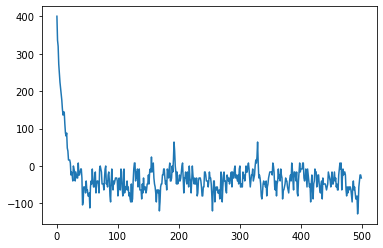

In [24]:
N = 500
L = 10
grade = np.ones((L,L))
print(grade.shape)
E_list =[[],[]]
for i in range(N):
    E = energiat(grade)
    E_list[0].append(E)
    E_list[1].append(E*E)
    for x in range(L):
        for y in range(L):
            spin = grade[x,y]
            #print(f'Spin {spin}')
            V =  calc_E(grade,x,y)
            Ei = spin * V
            Ef = -spin * V
            if Ef < Ei:
                grade[x,y] *= -1
            elif np.random.rand() < np.exp(-(Ef-Ei)/20):
                grade[x,y] *= -1
                

plt.plot(range(N),E_list[0])

In [25]:
df = pd.DataFrame(np.array(E_list).T, columns = ['E','E*2'])
df

,E,E*2
0,400.0,160000.0
1,336.0,112896.0
2,320.0,102400.0
3,272.0,73984.0
4,248.0,61504.0
...,...,...
495,-56.0,3136.0
496,-40.0,1600.0
497,-24.0,576.0
498,-24.0,576.0


In [26]:
df.describe()

,E,E*2
count,500.000000,500.000000
mean,-30.880000,3795.712000
std,53.365094,11425.136583
min,-128.000000,0.000000
25%,-56.000000,576.000000
50%,-40.000000,1600.000000
75%,-16.000000,3136.000000
max,400.000000,160000.000000


$$ C_v = \frac{<E^2> - <E>^2 }{k.T^2}$$

## Breve debate sobre outros métodos para Modelo de Ising

No caso mostrado acima utilizou-se um modelo de Ising que respeita as interações apenas dos vizinhos mais próximos. Podemos alterar esta interação para também pegarmos as interações com os próximos vizinhos, esta é chamada de next nearest neighbors (nnn). 

Há outras considerações que podemos fazer também:
1. Podemos considerar a mudança de posição entre spins, o que valeria para um modelo onde há deslocamento dos partículas de um sítio para o outro. Exemplo: hidrodinâmica, difusão. 
2. Podemos considerar agentes dando energia para spins de baixa energia, ou retirando as energias. Equivalente a um banho térmico. 
3. Existe a idea microcanônica do modelo de Ising, que merece uma lida mais detalhada para ser escrita aqui.

Ainda existem modelos de Ising para vidros (spin glasses), modelo de Ising com campo magnético, para superfícies de 2 substâncias, e outros. Cada modelo tem um resultado e simula eventos diferentes. O **importante** para se levar é: <font color='darkgreen'>O modelo de Ising é um modelo de interações de curta distância, e baseado no método de Monte Carlo conseguimos prever e compreender comportamentos variados.</font>

**IMPORTANTE:**

Pesquisar sobre correlação e erro estatístico no momento de realizar a simulação. É importante se ater a esses detalhes para conseguir confirmar que sua simulação é de fato precisa e que pode ser utilizada para compreender o evento.